Описание задачи  
Покемоны - это маленькие существа, которые сражаются друг с другом на соревнованиях. Все покемоны имеют разные характеристики (сила атаки, защиты и т. д.) И относятся к одному или двум так называемым классам (вода, огонь и т. д.). Профессор Оук является изобретателем Pokedex - портативного устройства, которое хранит информацию обо всех существующих покемонах. Как его ведущий специалист по данным, Вы только что получили от него запрос с просьбой осуществить аналитику данных на всех устройствах Pokedex.  

Описание набора данных

Профессор Оук скопировал все содержимое в память одного устройства Pokedex, в результате чего получился набор данных, с которым Вы будете работать в этой задаче. В этом файле каждая строка представляет характеристики одного покемона:

pid: Numeric - ID

HP: Numeric - Очки здоровья

Attack: Numeric - Сила обычной атаки

Defense: Numeric - Сила обычной защиты

Sp. Atk: Numeric - Сила специальной атаки

Sp. Def: Numeric - Сила специальной защиты

Speed: Numeric - Скорость движений

Legendary: Boolean - «True», если покемон редкий

Class 1: Categorical - Класс покемона

Class 2: Categorical - Класс покемона

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as stats


df = pd.read_csv('https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/pokemon.csv', on_bad_lines='skip')
df


,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False
...,...,...,...,...,...,...,...,...,...,...,...
795,796,Diancie,Rock,Fairy,50,100,150,100,150,50,True
796,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,True
797,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,True
798,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,True


In [ ]:
print(df.isnull().sum())

pid            0
Name           1
Class 1        0
Class 2      386
HP             0
Attack         0
Defense        0
Sp. Atk        0
Sp. Def        0
Speed          0
Legendary      0
dtype: int64


In [ ]:
df['Class 2'] = df['Class 2'].fillna(df['Class 2'].mode()[0])
print(df.isnull().sum())

pid          0
Name         1
Class 1      0
Class 2      0
HP           0
Attack       0
Defense      0
Sp. Atk      0
Sp. Def      0
Speed        0
Legendary    0
dtype: int64


In [ ]:
"""Задание 1
Профессор Оук подозревает, что покемоны в классе Grass имеют более сильную обычную атаку, чем покемоны в классе Rock.
Проверьте, прав ли он, и убедите его в своём выводе статистически.
Примечание: если есть покемоны, которые относятся к обоим классам, просто выбросьте их;
Вы можете предположить, что распределение обычных атак является нормальным для всех классов покемонов."""


"""Исключаем покемонов, принадлежащих сразу двум классам"""
grass_only = df[(df["Class 1"] == 'Grass') & (df["Class 2"] != 'Grass')]
rock_only = df[(df["Class 1"] == 'Rock') & (df["Class 2"] != 'Rock')]

"""Получаем массивы значений силы атаки для каждого класса"""
attack_grass = grass_only['Attack'].values
attack_rock = rock_only['Attack'].values

"""Преобразуем массивы в датафреймы и посмотрим статистику"""
df_attack_grass = pd.DataFrame(attack_grass)
df_attack_rock = pd.DataFrame(attack_rock)

print(df_attack_grass.describe())
print(df_attack_rock.describe())

"""Проверка равенства дисперсий с помощью критерия Левене"""
levene_test_result = stats.levene(attack_grass, attack_rock)

if levene_test_result.pvalue > 0.05:
    print("Дисперсии одинаковы, применяем стандартный t-тест")
    t_statistic, p_value = stats.ttest_ind(attack_grass, attack_rock)
else:
    print("Дисперсии неодинаковы, применяем t-тест с поправкой Уэлча")
    t_statistic, p_value = stats.ttest_ind(attack_grass, attack_rock, equal_var=False)

print(f"т-статистика: {t_statistic:.10f}")
print(f"p-значение: {p_value:.10f}")
"""Похоже что профессор Оук ошибся, перекос по средней атаке в сторону класса rock."""

                0
count   70.000000
mean    73.214286
std     25.380520
min     27.000000
25%     55.000000
50%     70.000000
75%     93.500000
max    132.000000
                0
count   44.000000
mean    92.863636
std     35.325458
min     40.000000
25%     59.750000
50%     95.000000
75%    120.250000
max    165.000000
Дисперсии неодинаковы, применяем t-тест с поправкой Уэлча
т-статистика: -3.2060109746
p-значение: 0.0020206565


'Похоже что профессор Оук ошибся, перекос по средней атаке в сторону класса rock.'

In [ ]:
"""Задание 2
Профессор Оук уже долго не может спать по ночам, ведь его волнует вопрос, а правда ли,
что покемоны в классе Water в среднем быстрее, чем покемоны в классе Normal.
Проверьте, прав ли он, и убедите его в своём выводе статистически.
Примечание: если есть покемоны, которые относятся к обоим классам, выбросьте их;
Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов."""

"""Исключаем покемонов, принадлежащих сразу двум классам"""
water_only = df[(df["Class 1"] == 'Water') & (df["Class 2"] != 'water')]
normal_only = df[(df["Class 1"] == 'Normal') & (df["Class 2"] != 'Normal')]

"""Получаем массивы значений силы скорости для каждого класса"""
speed_water = water_only['Speed'].values
speed_normal = normal_only['Speed'].values

"""Преобразуем массивы в датафреймы и посмотрим статистику"""
df_speed_water = pd.DataFrame(speed_water)
df_speed_normal = pd.DataFrame(speed_normal)

print(df_speed_water.describe())
print(df_speed_normal.describe())

"""Проверка равенства дисперсий с помощью критерия Левене"""
levene_test_result = stats.levene(speed_water, speed_normal)

if levene_test_result.pvalue > 0.05:
    print("Дисперсии одинаковы, применяем стандартный t-тест")
    t_statistic, p_value = stats.ttest_ind(speed_water, speed_normal)
else:
    print("Дисперсии неодинаковы, применяем t-тест с поправкой Уэлча")
    t_statistic, p_value = stats.ttest_ind(speed_water, speed_normal, equal_var=False)

print(f"т-статистика: {t_statistic:.10f}")
print(f"p-значение: {p_value:.10f}")
"""Похоже профессор Оук и тут ошибся, есть перекос по средней скорости в сторону класса normal. """

                0
count  112.000000
mean    65.964286
std     23.019353
min     15.000000
25%     50.000000
50%     65.000000
75%     82.000000
max    122.000000
                0
count   98.000000
mean    71.551020
std     28.406157
min      5.000000
25%     50.000000
50%     71.000000
75%     90.750000
max    135.000000
Дисперсии неодинаковы, применяем t-тест с поправкой Уэлча
т-статистика: -1.5515751281
p-значение: 0.1224578714


'Похоже профессор Оук и тут ошибся, есть перекос по средней скорости в сторону класса normal. '

In [ ]:
"""Задание 3
Профессор Оук тот еще безумец. Он изобрёл сыворотку, способную ускорить покемона. Однако мы усомнились в эффективности его вакцины.
Професоор дал эту сыворотку следующим покемонам: смотри массив treathed_pokemon. Проверьте, работает ли вообще его сыворотка,
убедите всех в своём выводе статистически.
Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов."""

"""Покемоны, которые принимали сыворотку увеличения скорости"""
treathed_pokemon = ['Mega Beedrill', 'Mega Alakazam', 'Deoxys Normal Forme', 'Mega Lopunny']

"""Фильтруем данные на покемонов которые применяли сыворотку и не применяли"""
filter_pokemon = df[df['Name'].isin(treathed_pokemon)]
order_pokemon = df[~df['Name'].isin(treathed_pokemon)]

"""Преобразуем массивы в датафреймы и посмотрим статистику"""
df_filter_pokemon = pd.DataFrame(filter_pokemon)
df_order_pokemon = pd.DataFrame(order_pokemon)

print(df_filter_pokemon['Speed'].describe())
print(df_order_pokemon['Speed'].describe())

"""Проверка равенства дисперсий с помощью критерия Левене"""
levene_test_result = stats.levene(filter_pokemon['Speed'], order_pokemon['Speed'])

if levene_test_result.pvalue > 0.05:
    print("Дисперсии одинаковы, применяем стандартный t-тест")
    t_statistic, p_value = stats.ttest_ind(filter_pokemon ['Speed'], order_pokemon['Speed'])
else:
    print("Дисперсии неодинаковы, применяем t-тест с поправкой Уэлча")
    f_statistic, p_value = stats.ttest_ind(filter_pokemon ['Speed'], order_pokemon['Speed'], equal_var=False)



print(f"т-статистика: {t_statistic:.10f}")
print(f"p-значение: {p_value:.10f}")
"""Похоже что сыворотка и правда действует, средние значения скорости испытуемых намного выше остальных,
 но в идеале нужно знать скорость испытуемых "до" и "после"."""

count      4.000000
mean     145.000000
std        7.071068
min      135.000000
25%      142.500000
50%      147.500000
75%      150.000000
max      150.000000
Name: Speed, dtype: float64
count    796.000000
mean      67.891960
std       28.614785
min        5.000000
25%       45.000000
50%       65.000000
75%       90.000000
max      180.000000
Name: Speed, dtype: float64
Дисперсии неодинаковы, применяем t-тест с поправкой Уэлча
т-статистика: 20.9639166309
p-значение: 0.0000810753


'Похоже что сыворотка и правда действует, средние значения скорости испытуемых намного выше остальных,\n но в идеале нужно знать скорость испытуемых "до" и "после".'

In [ ]:
"""Задание 4
Профессор Оук всегда любил истории про легендарных покемонов. Однако профессор не очень уверен,
что они лучше остальных покемонов. Оук предложил разобраться в этом нам.
Проверьте, действительно ли сумма характеристик HP,Attack,Defense у легендарных покемонов выше, чем у других покемонов?
А произведение этих же параметров?
Найдите ответы на эти вопросы и убедите всех в своём выводе статистически.
Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов."""


"""Разделение покемонов на легендарных и нелегендарных"""
legendary_pokemons = df[df['Legendary'] == True]
non_legendary_pokemons = df[df['Legendary'] == False]

"""Преобразуем массивы в датафреймы и посмотрим статистику"""
df_legendary_pokemons = pd.DataFrame(legendary_pokemons)
df_non_legendary_pokemons = pd.DataFrame(non_legendary_pokemons)

print(df_legendary_pokemons[['HP', 'Attack', 'Defense']].describe())
print(df_non_legendary_pokemons[['HP', 'Attack', 'Defense']].describe())

"""Расчет суммы характеристик"""
sum_had = legendary_pokemons[['HP', 'Attack', 'Defense']].sum(axis=1)
sum_non_had = non_legendary_pokemons[['HP', 'Attack', 'Defense']].sum(axis=1)

"""Расчет произведения характеристик"""
prod_had = legendary_pokemons[['HP', 'Attack', 'Defense']].prod(axis=1)
prod_non_had = non_legendary_pokemons[['HP', 'Attack', 'Defense']].prod(axis=1)

"""Сравнение сумм характеристик через т-тест"""
t_sum, p_sum = stats.ttest_ind(sum_had, sum_non_had)

"""Сравнение произведений характеристик через т-тест"""
t_prod, p_prod = stats.ttest_ind(prod_had, prod_non_had)

print(f"сумма произведений: т-статистика: {t_sum:.10f}, р-значение: {p_sum:.10f}")
print(f"сравнение произведений: т-статистика: {t_prod:.10f},р-значение: {p_prod:.10f}")
"""Похоже легендарные покемоны и правда превосходят остальных.
Их средние значения здоровья, атаки и защиты значительно выше."""

               HP      Attack     Defense
count   65.000000   65.000000   65.000000
mean    92.738462  116.676923   99.661538
std     21.722164   30.348037   28.255131
min     50.000000   50.000000   20.000000
25%     80.000000  100.000000   90.000000
50%     91.000000  110.000000  100.000000
75%    105.000000  131.000000  115.000000
max    150.000000  190.000000  200.000000
               HP      Attack     Defense
count  735.000000  735.000000  735.000000
mean    67.182313   75.669388   71.559184
std     24.808849   30.490153   30.408194
min      1.000000    5.000000    5.000000
25%     50.000000   54.500000   50.000000
50%     65.000000   72.000000   66.000000
75%     79.500000   95.000000   85.000000
max    255.000000  185.000000  230.000000
сумма произведений: т-статистика: 11.5918523665, р-значение: 0.0000000000
сравнение произведений: т-статистика: 13.2632534082,р-значение: 0.0000000000


'Похоже легендарные покемоны и правда превосходят остальных.\nИх средние значения здоровья, атаки и защиты значительно выше.'

In [ ]:
"""Задание 5
Профессор Оук частенько наблюдает за боями покемонов. После очередных таких боёв Оук выделил четыре класса best_defence_class,
которые на его взгляд одинаковы по “силе обычной защиты” Defense.
Проверьте, действительно ли эти классы покемонов не отличаются по уровню защиты статистически значимо? Всё та же статистика вам в помощь!
Вы можете предположить, что распределение параметров защитных характеристик является нормальным для всех классов покемонов."""

best_defence_class = ['Rock', 'Ground', 'Steel', 'Ice']

"""Преобразуем массивы в датафреймы и посмотрим среднее значение по защите."""
df_Rock_defence = pd.DataFrame(df[(df["Class 1"] == 'Rock')] ['Defense'])
df_Ground_defence = pd.DataFrame(df[(df["Class 1"] == 'Ground')] ['Defense'])
df_Steel_defence = pd.DataFrame(df[(df["Class 1"] == 'Steel')] ['Defense'])
df_Ice_defence = pd.DataFrame(df[(df["Class 1"] == 'Ice')] ['Defense'])

print(
    np.mean(df_Rock_defence),
    np.mean(df_Ground_defence),
    np.mean(df_Steel_defence),
    np.mean(df_Ice_defence)
    )

"""Поскольку у нас четыре выборки используем однофакторный дисперсионный анализ (ANOVA)"""
f_statistic, p_value = stats.f_oneway( df[(df["Class 1"] == 'Rock')] ['Defense'],
                                       df[(df["Class 1"] == 'Ground')] ['Defense'],
                                       df[(df["Class 1"] == 'Steel')] ['Defense'],
                                       df[(df["Class 1"] == 'Ice')] ['Defense']
                                       )

print(f"статистика: {t_statistic:.10f}")
print(f"p-значение: {p_value:.10f}")
"""Т-статистика отрицательная, скорее всего есть перекос по в сторону одного или нескольких классов."""

100.79545454545455 84.84375 126.37037037037037 71.41666666666667
статистика: 20.9639166309
p-значение: 0.0000030803


'Т-статистика отрицательная, скорее всего есть перекос по в сторону одного или нескольких классов.'

<ipython-input-132-a020f15cf699>:11: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(data, labels=labels)


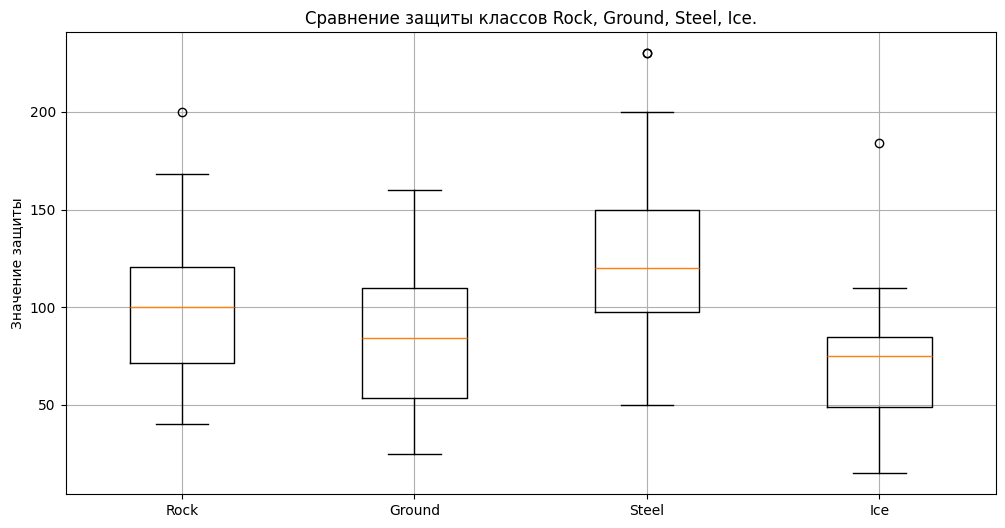

In [ ]:
import matplotlib.pyplot as plt

labels = ['Rock', 'Ground', 'Steel', 'Ice']
data =  [df[(df["Class 1"] == 'Rock')] ['Defense'],
         df[(df["Class 1"] == 'Ground')] ['Defense'],
         df[(df["Class 1"] == 'Steel')] ['Defense'],
         df[(df["Class 1"] == 'Ice')] ['Defense']
         ]

fig, ax = plt.subplots(figsize=(12, 6))
ax.boxplot(data, labels=labels)
ax.set_title('Сравнение защиты классов Rock, Ground, Steel, Ice.')
ax.set_ylabel('Значение защиты')
plt.grid(True)
plt.show()
"""Судя по графику, большой разнице средних значений защиты и отрицательной статистики,
можно сделать вывод, что между этими классами есть значительная разница."""